In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# output metadata
_scratch = "/pscratch/sd/n/nagarwal/"
_prototype = "cp1"
_expt = "R2"
_prototypes = "/global/homes/n/nagarwal/graph-ufs/prototypes/"
_inference_dir = os.path.join(_scratch, _prototype, _expt,
                              "inference", "validation")

In [3]:
# GraphUFS predictions
fname = "graphufs.240h.zarr"
ds_pred = xr.open_zarr(os.path.join(_inference_dir, fname))
ds_pred

<xarray.Dataset> Size: 803GB
Dimensions:    (time: 512, lead_time: 40, lat: 192, lon: 384, level: 16, z_l: 10)
Coordinates:
  * lat        (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lead_time  (lead_time) timedelta64[ns] 320B 0 days 06:00:00 ... 10 days 0...
  * level      (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * lon        (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time       (time) datetime64[ns] 4kB 2022-01-01T06:00:00 ... 2023-10-02
  * z_l        (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7
Data variables: (12/22)
    LW         (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    SSH        (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    SW         (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    dzdt       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    icec       (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    icetk      (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    ...         ...
    ugrd       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    ugrd10m    (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    uo         (time, lead_time, z_l, lat, lon) float32 60GB dask.array<chunksize=(1, 40, 10, 192, 384), meta=np.ndarray>
    vgrd       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    vgrd10m    (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    vo         (time, lead_time, z_l, lat, lon) float32 60GB dask.array<chunksize=(1, 40, 10, 192, 384), meta=np.ndarray>

In [4]:
# Replay targets
fname = "replay.240h.zarr"
ds_tar = xr.open_zarr(os.path.join(_inference_dir, fname))
ds_tar

<xarray.Dataset> Size: 1TB
Dimensions:    (time: 512, lead_time: 40, lat: 192, lon: 384, level: 16, z_l: 10)
Coordinates:
  * lat        (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lead_time  (lead_time) timedelta64[ns] 320B 0 days 06:00:00 ... 10 days 0...
  * level      (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * lon        (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time       (time) datetime64[ns] 4kB 2022-01-01T06:00:00 ... 2023-10-02
  * z_l        (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7
Data variables: (12/22)
    LW         (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    SSH        (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    SW         (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    dzdt       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    icec       (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    icetk      (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    ...         ...
    ugrd       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    ugrd10m    (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    uo         (time, z_l, lead_time, lat, lon) float64 121GB dask.array<chunksize=(1, 10, 40, 192, 384), meta=np.ndarray>
    vgrd       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    vgrd10m    (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    vo         (time, z_l, lead_time, lat, lon) float64 121GB dask.array<chunksize=(1, 10, 40, 192, 384), meta=np.ndarray>

In [5]:
# Open the existing ocean zarr-store
ocn = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.zarr",
    storage_options={"token": "anon"},
)
ocn

<xarray.Dataset> Size: 5TB
Dimensions:       (time: 43826, lat: 192, lon: 384, zl: 75, z_l: 75)
Coordinates:
    cftime        (time) object 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
  * lat           (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lon           (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time          (time) datetime64[ns] 351kB 1993-12-31T18:00:00 ... 2023-12-31
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
  * zl            (zl) float64 600B 1.0 3.0 5.0 ... 3.591e+03 5.111e+03
Data variables: (12/20)
    Heat_PmE      (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LwLatSens     (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SSH           (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    evap          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...            ...
    so            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    taux          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    tauy          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    temp          (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    uo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    vo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [6]:
# Open the existing atm zarr-store
atm = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)
atm

<xarray.Dataset> Size: 60TB
Dimensions:        (time: 87020, grid_yt: 192, grid_xt: 384, pfull: 127)
Coordinates:
    cftime         (time) object 696kB dask.array<chunksize=(21755,), meta=np.ndarray>
    ftime          (time) timedelta64[ns] 696kB dask.array<chunksize=(21755,), meta=np.ndarray>
  * grid_xt        (grid_xt) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * grid_yt        (grid_yt) float64 2kB 89.82 88.89 87.95 ... -88.18 -89.12
  * pfull          (pfull) float32 508B 0.01278 0.02033 0.03177 ... 996.2 998.8
  * time           (time) datetime64[ns] 696kB 1993-12-31T18:00:00 ... 2023-1...
Data variables: (12/183)
    acond          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    albdo_ave      (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnsf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alnwf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvsf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    alvwf          (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...             ...
    xtts           (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xu             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xv             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xz             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    xzts           (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    zc             (time, grid_yt, grid_xt) float32 26GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

## Surface Pressure

In [36]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 30
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)

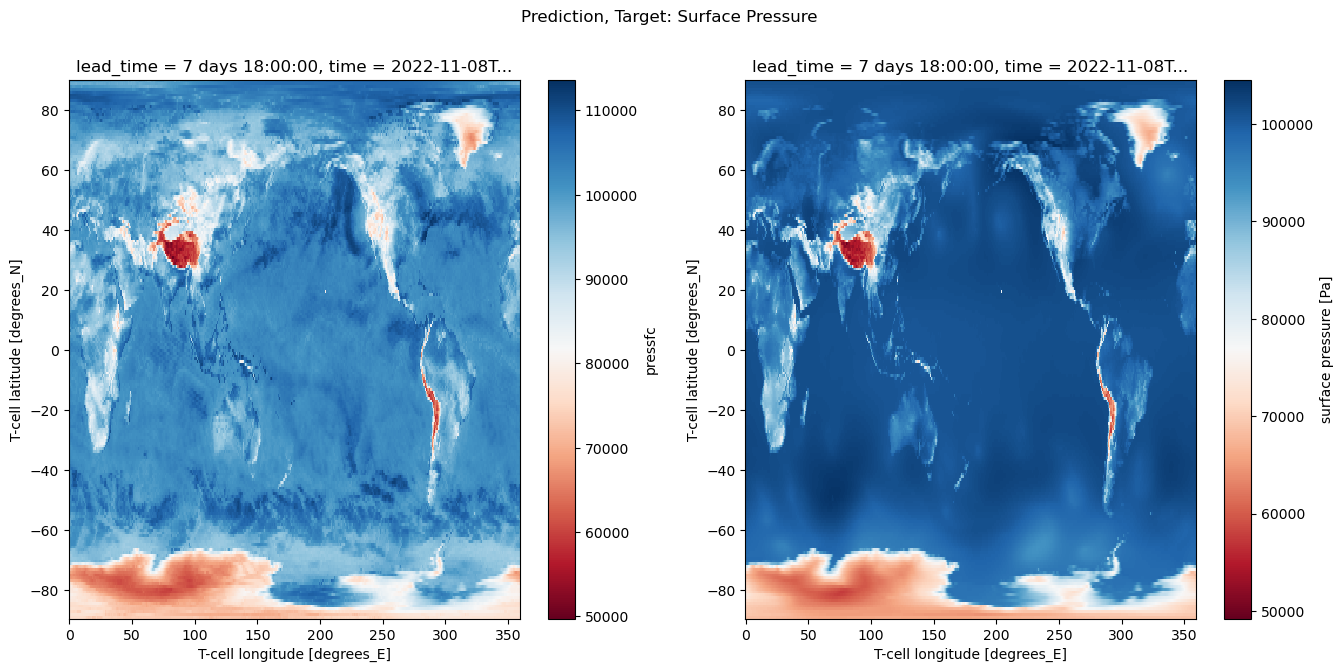

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))
kwargs = dict(cmap="RdBu")
ds_pred.pressfc.isel(time=itime, lead_time=ileadtime,).plot(ax=ax[0], **kwargs)
ds_tar.pressfc.isel(time=itime, lead_time=ileadtime,).plot(ax=ax[1], **kwargs)
plt.suptitle(f"Prediction, Target: Surface Pressure")
plt.show()

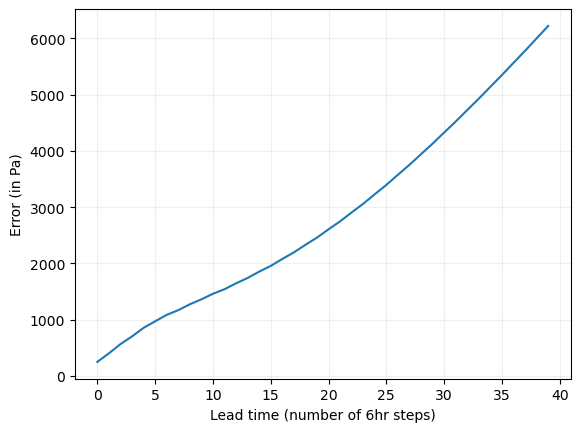

In [9]:
# RMSE Error
pressfc_sqerror = (ds_tar.pressfc - ds_pred.pressfc)**2
plt.plot(np.sqrt(pressfc_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in Pa)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

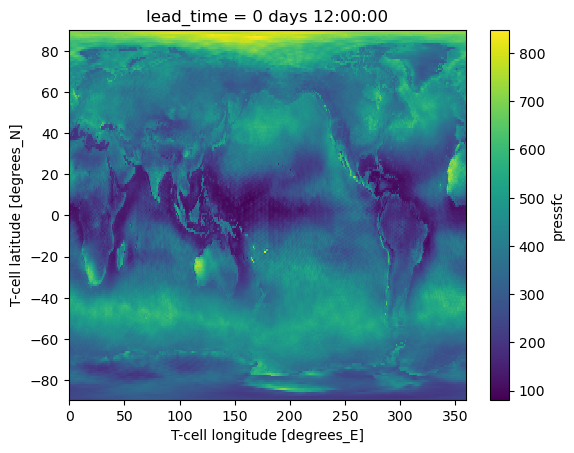

In [38]:
# Spatial RMSE
ileadtime = 1
pressfc_rmse_latlon = np.sqrt(pressfc_sqerror.mean(dim=('time')))
pressfc_rmse_latlon.isel(lead_time=ileadtime).plot()
plt.show()

## 2m Temp

In [11]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 10
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)

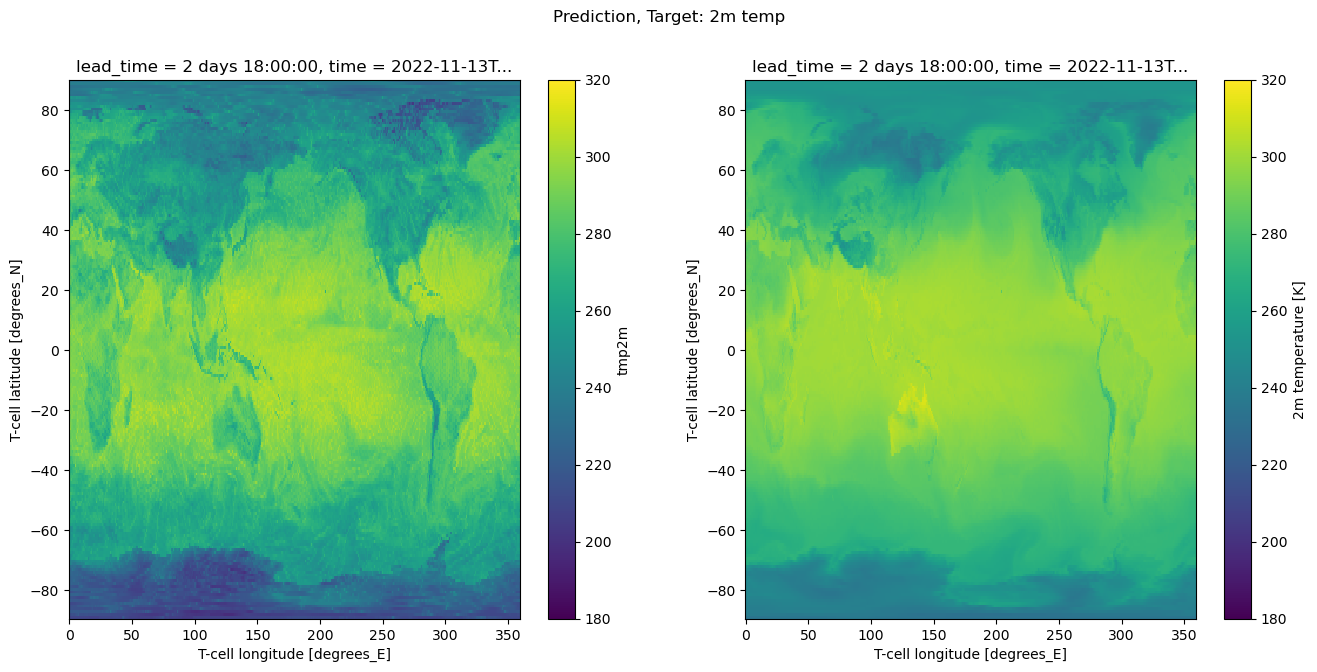

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))
kwargs = dict(vmin=180, vmax=320)
ds_pred.tmp2m.isel(time=itime, lead_time=ileadtime,).plot(ax=ax[0], **kwargs)
ds_tar.tmp2m.isel(time=itime, lead_time=ileadtime,).plot(ax=ax[1], **kwargs)
plt.suptitle(f"Prediction, Target: 2m temp")
plt.show()

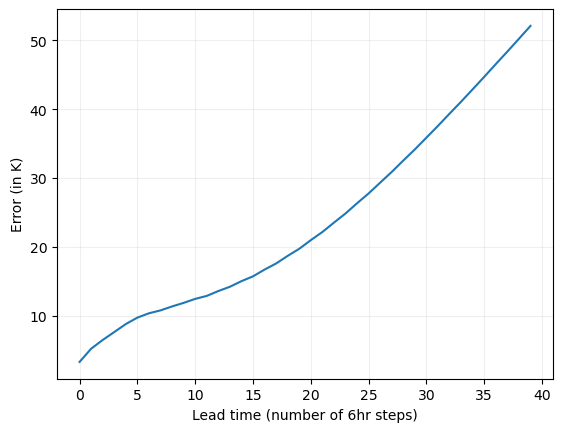

In [13]:
# RMSE Error
tmp2m_sqerror = (ds_tar.tmp2m - ds_pred.tmp2m)**2
plt.plot(np.sqrt(tmp2m_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in K)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

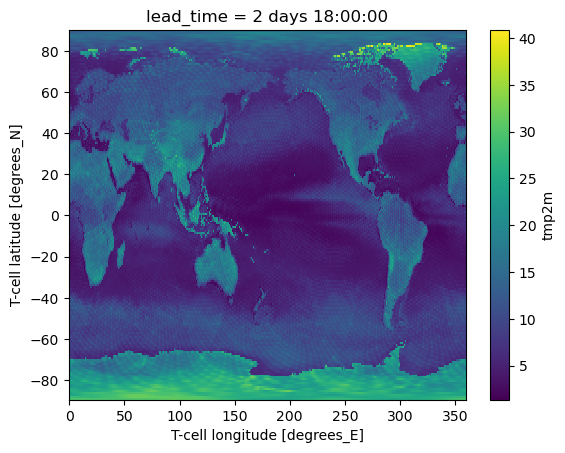

In [14]:
# Spatial RMSE
ileadtime = 10
tmp2m_rmse_latlon = np.sqrt(tmp2m_sqerror.mean(dim=('time')))
tmp2m_rmse_latlon.isel(lead_time=ileadtime).plot()
plt.show()

### SSH

In [15]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 10
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)

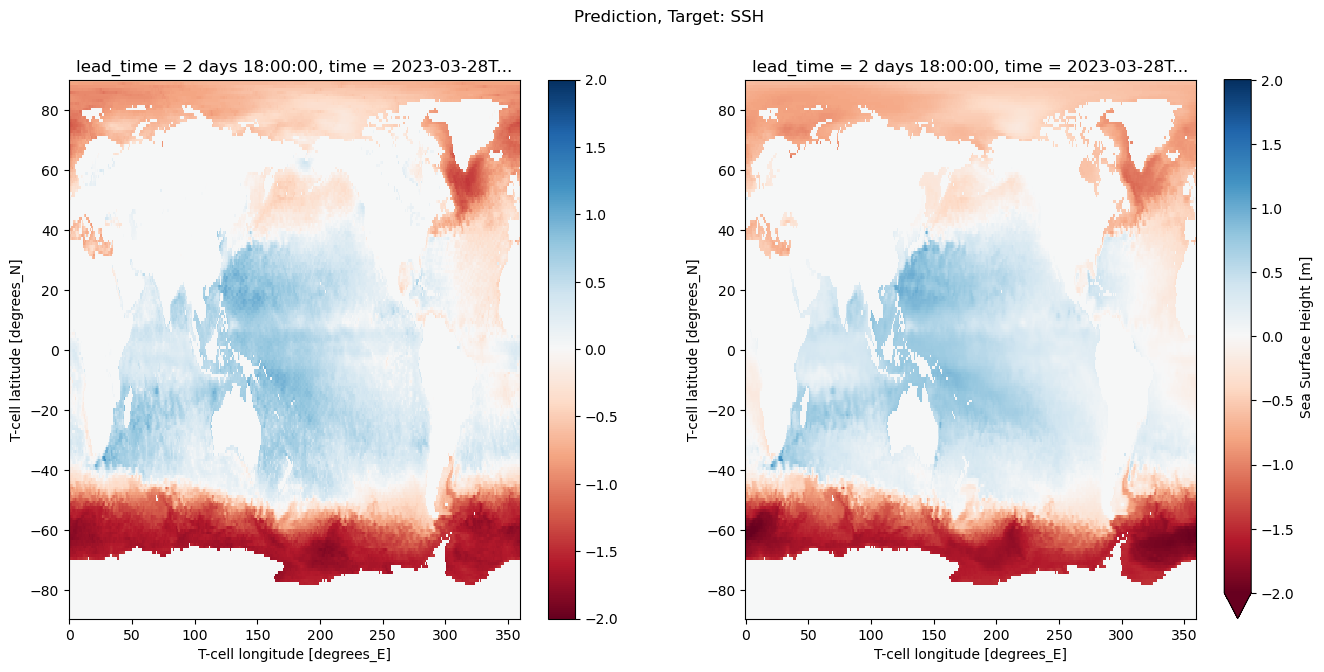

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))
kwargs = dict(vmin=-2, vmax=2, cmap="RdBu")
pred = ds_pred.SSH.isel(time=itime, lead_time=ileadtime,)*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"}))
pred.plot(ax=ax[0], **kwargs)
ds_tar.SSH.isel(time=itime, lead_time=ileadtime,).plot(ax=ax[1], **kwargs)
plt.suptitle(f"Prediction, Target: SSH")
plt.show()

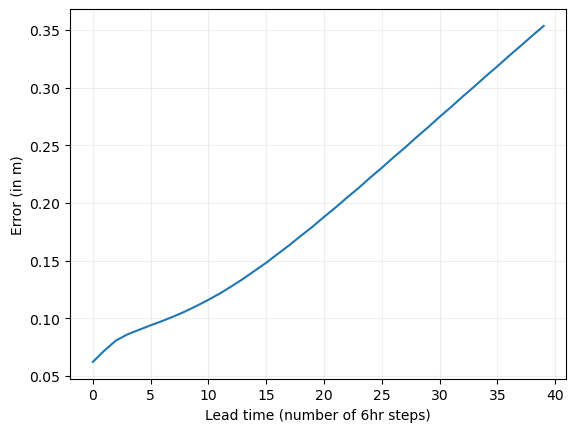

In [17]:
ssh_sqerror = (ds_tar.SSH - ds_pred.SSH*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(ssh_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in m)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

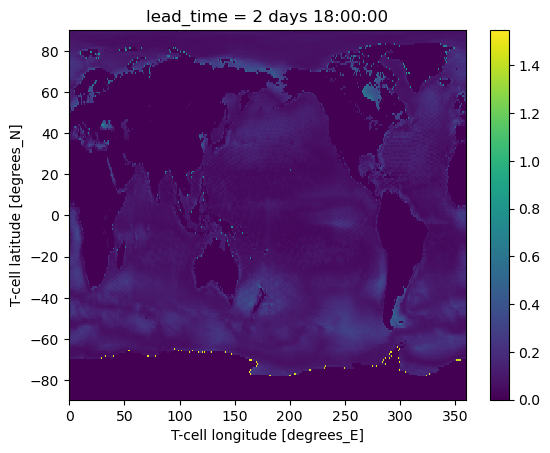

In [18]:
# Spatial RMSE
ileadtime = 10
ssh_rmse_latlon = np.sqrt(ssh_sqerror.mean(dim=('time')))
ssh_rmse_latlon.isel(lead_time=ileadtime).plot()
plt.show()

### Temp

In [11]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 10
iz_l = -1
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)

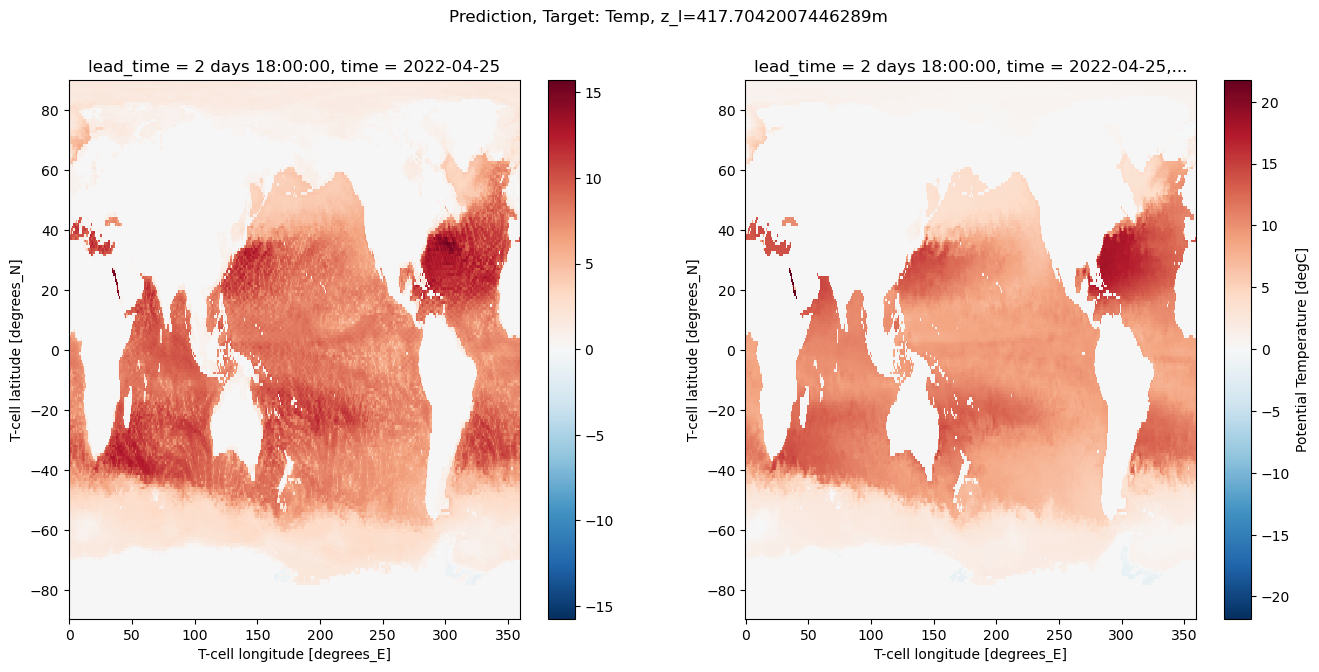

In [16]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
pred = ds_pred.temp.isel(time=itime, lead_time=ileadtime, z_l=iz_l)*(1-ocn.landsea_mask.sel(z_l=depth, method="nearest"))
pred.plot(ax=ax[0], cmap="RdBu_r")
ds_tar.temp.isel(time=itime, lead_time=ileadtime, z_l=iz_l).plot(ax=ax[1], cmap="RdBu_r")
plt.suptitle(f'Prediction, Target: Temp, z_l={ds_pred.coords["z_l"][iz_l].values}m')
plt.show()

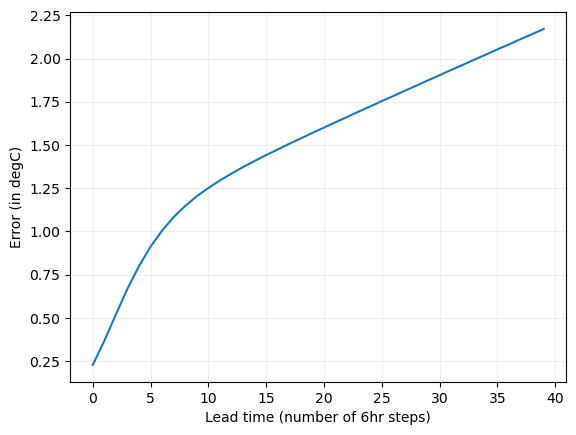

In [17]:
temp_sqerror = (ds_tar.temp.isel(z_l=iz_l) - ds_pred.temp.isel(z_l=iz_l)*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(temp_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in degC)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

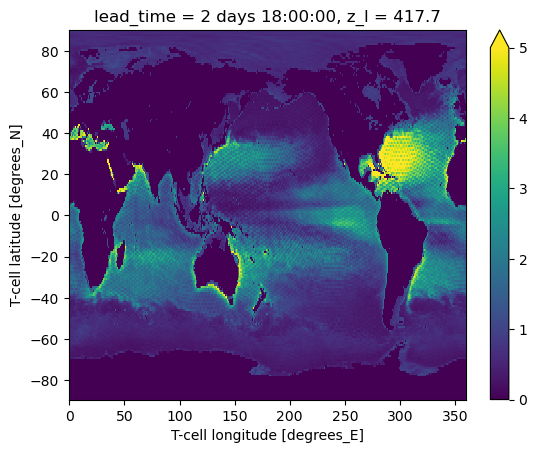

In [18]:
# Spatial RMSE
ileadtime = 10
temp_rmse_latlon = np.sqrt(temp_sqerror.mean(dim=('time')),)
temp_rmse_latlon.isel(lead_time=ileadtime).plot(vmin=0, vmax=5)
plt.show()

In [23]:
# latitude vs depth RMSE for 3D temp
# get the landsea_mask
landsea_mask = xr.where(ds_tar.so.isel(time=0, lead_time=0)==0, 0, 1)

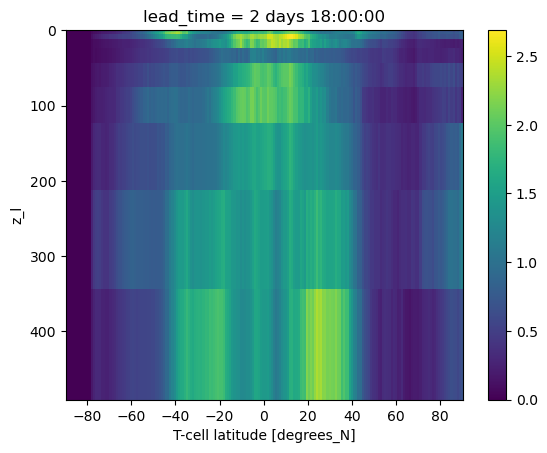

In [24]:
ileadtime = 10
temp_sqerror_depth = (ds_tar.temp - (ds_pred.temp*landsea_mask))**2
temp_rmse_latdepth = np.sqrt(temp_sqerror_depth.mean(dim=("time", "lon")),)
temp_rmse_latdepth.isel(lead_time=ileadtime).plot()
plt.gca().invert_yaxis()
plt.show()

## Salinity

In [23]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 10
iz_l = -1
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)
vmin=0; vmax=30

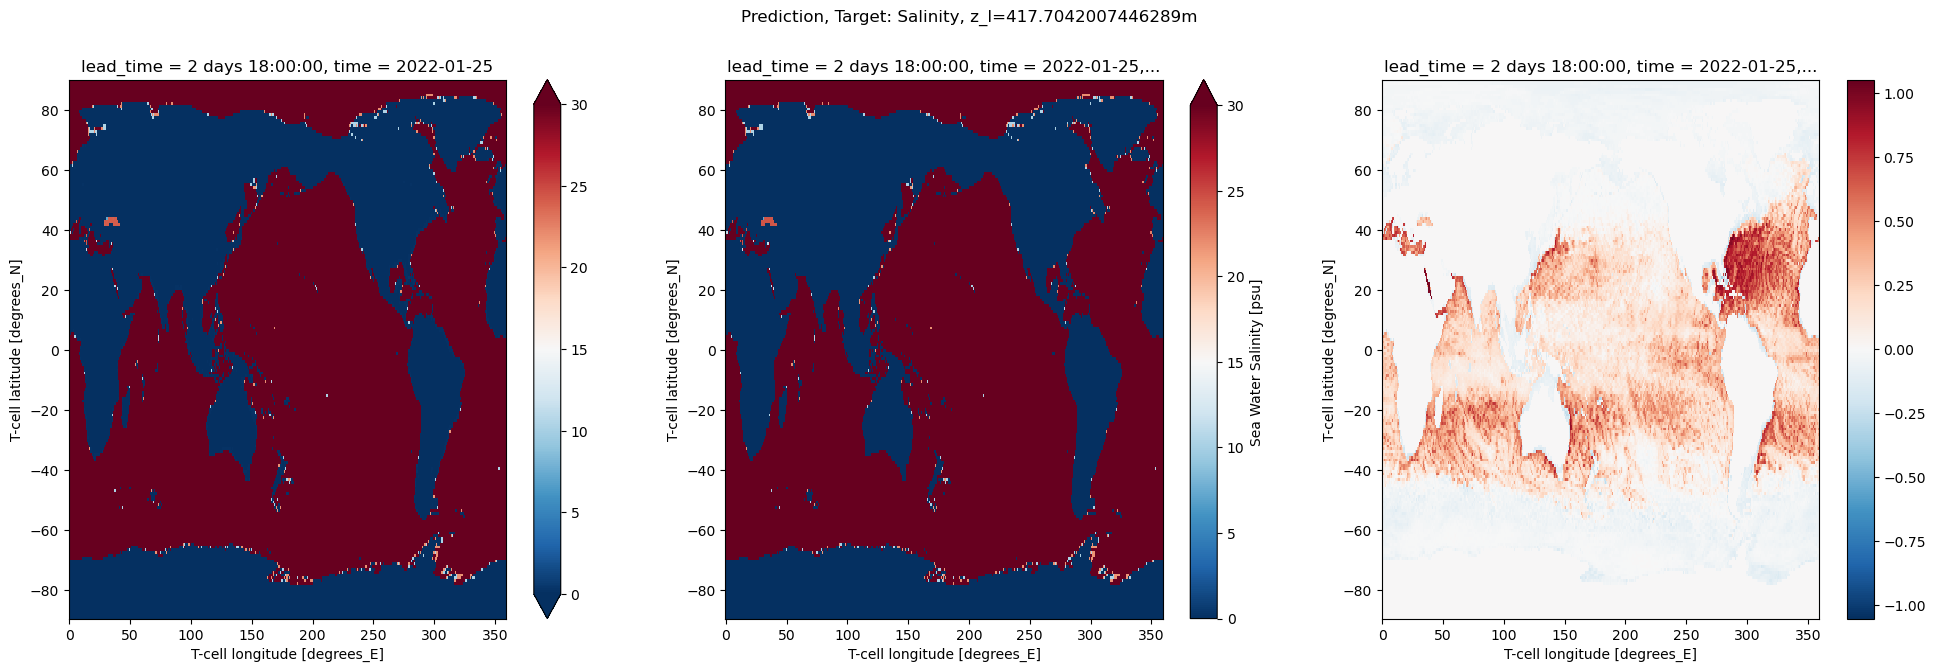

In [27]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
pred = ds_pred.so.isel(time=itime, lead_time=ileadtime, z_l=iz_l)*(1-ocn.landsea_mask.sel(z_l=depth, method="nearest"))
pred.plot(ax=ax[0], cmap="RdBu_r", vmin=vmin, vmax=vmax)
ds_tar.so.isel(time=itime, lead_time=ileadtime, z_l=iz_l).plot(ax=ax[1], cmap="RdBu_r", vmin=vmin, vmax=vmax)
diff = ds_tar.so.isel(time=itime, lead_time=ileadtime, z_l=iz_l) - pred
diff.plot(ax=ax[2], cmap="RdBu_r")
plt.suptitle(f'Prediction, Target: Salinity, z_l={ds_pred.coords["z_l"][iz_l].values}m')
plt.show()

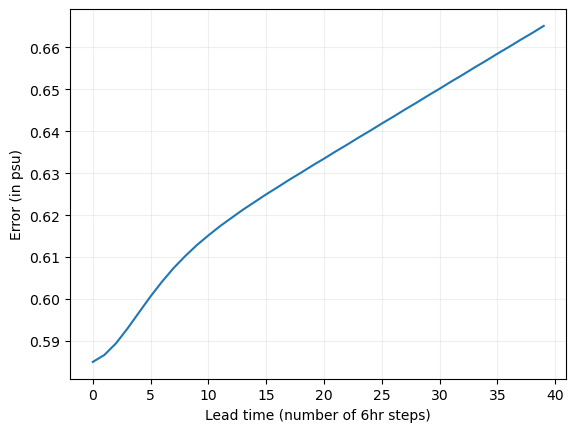

In [25]:
sal_sqerror = (ds_tar.so.isel(z_l=iz_l) - ds_pred.so.isel(z_l=iz_l)*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(sal_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in psu)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

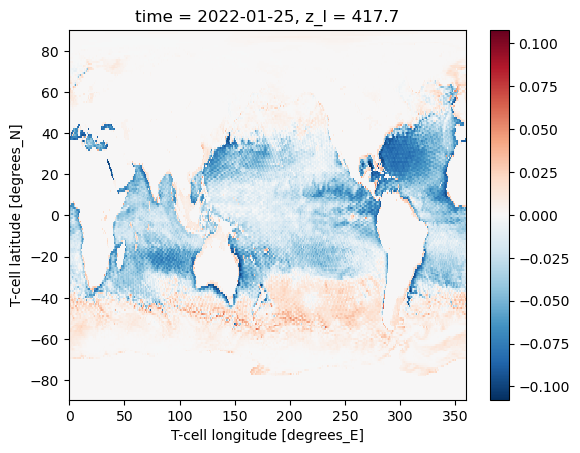

In [33]:
## look at the model predictions: are they even nonzero
timediff_so = (ds_pred.so.isel(time=itime, lead_time=1, z_l=iz_l) - ds_pred.so.isel(time=itime, lead_time=0, z_l=iz_l))*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"}))
timediff_so.plot(cmap="RdBu_r",)
plt.show()

### Ice Concentration 

In [25]:
ileadtime = 10
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)

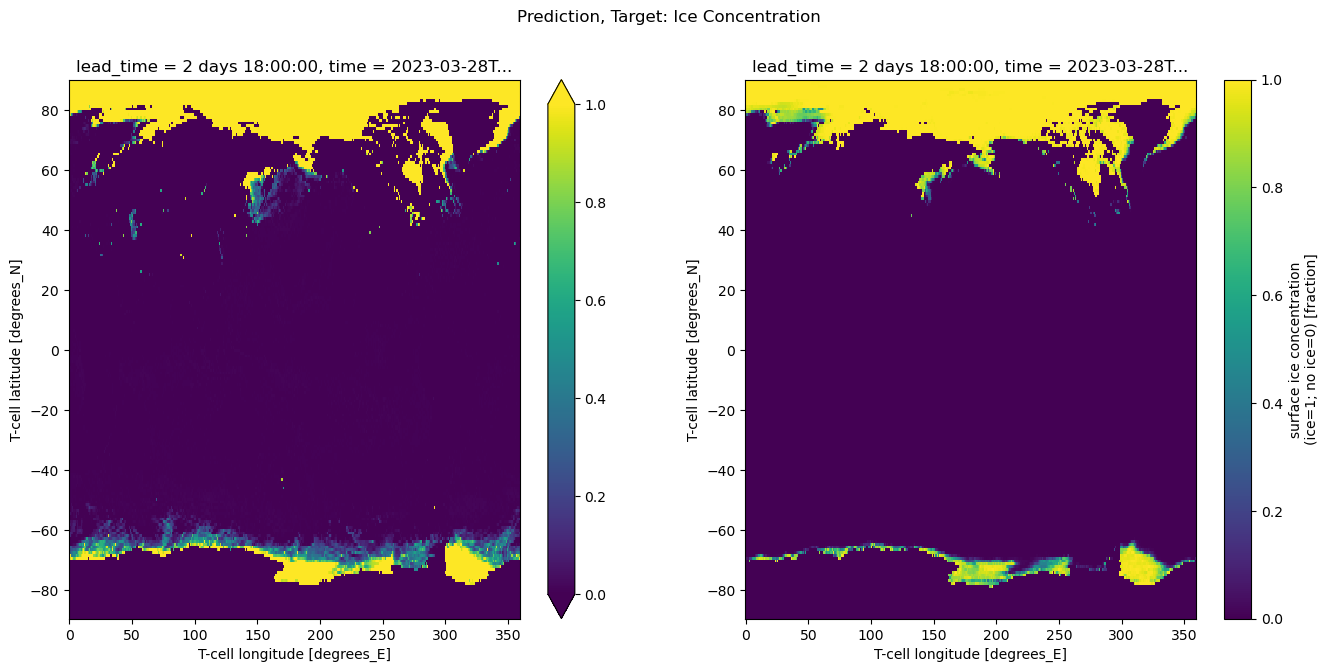

In [26]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
kwargs = {"cmap":"viridis",}
pred = ds_pred.icec.isel(time=itime, lead_time=ileadtime)*(1-atm.land_static.rename({"grid_yt":"lat", "grid_xt":"lon"}))
pred.plot(ax=ax[0], **kwargs, vmin=0, vmax=1)
ds_tar.icec.isel(time=itime, lead_time=ileadtime).plot(ax=ax[1], **kwargs)
plt.suptitle(f'Prediction, Target: Ice Concentration')
plt.show()

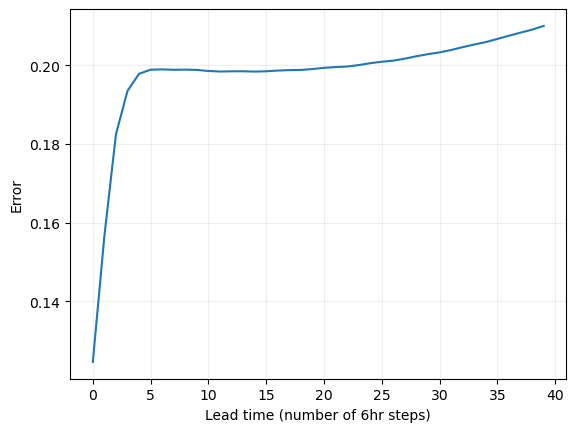

In [27]:
icec_sqerror = (ds_tar.icec - ds_pred.icec*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(icec_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

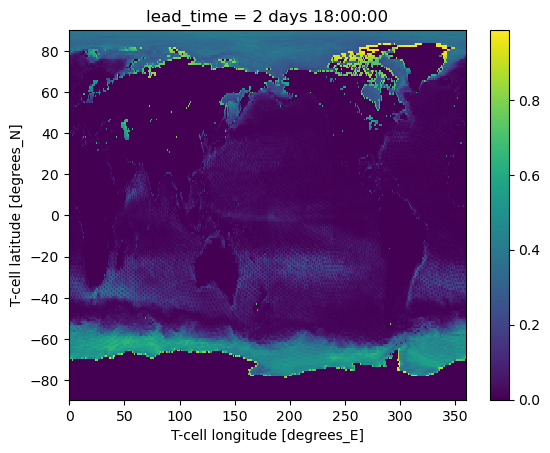

In [28]:
# Spatial RMSE
ileadtime = 10
icec_rmse_latlon = np.sqrt(icec_sqerror.mean(dim=('time')),)
icec_rmse_latlon.isel(lead_time=ileadtime).plot()
plt.show()

### Ice Thickness

In [29]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = 10
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)

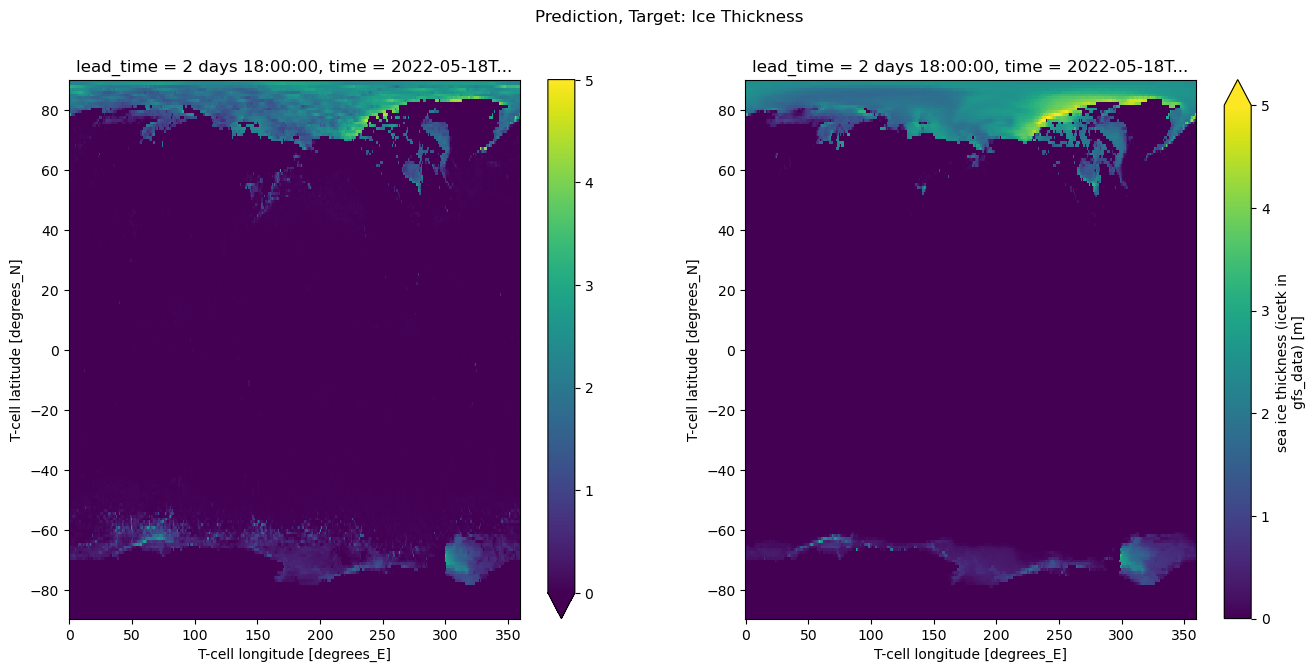

In [30]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
kwargs = {"cmap":"viridis", "vmin":0, "vmax":5}
pred = ds_pred.icetk.isel(time=itime, lead_time=ileadtime)*(1-atm.land_static.rename({"grid_yt":"lat", "grid_xt":"lon"}))
pred.plot(ax=ax[0], **kwargs)
ds_tar.icetk.isel(time=itime, lead_time=ileadtime).plot(ax=ax[1], **kwargs)
plt.suptitle(f'Prediction, Target: Ice Thickness')
plt.show()

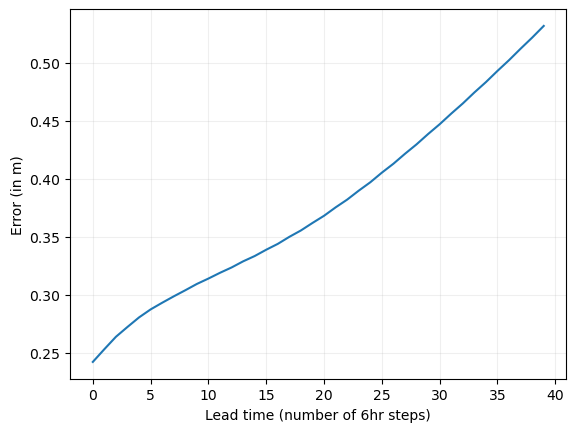

In [31]:
icetk_sqerror = (ds_tar.icetk - ds_pred.icetk*(1-atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(icetk_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (in m)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

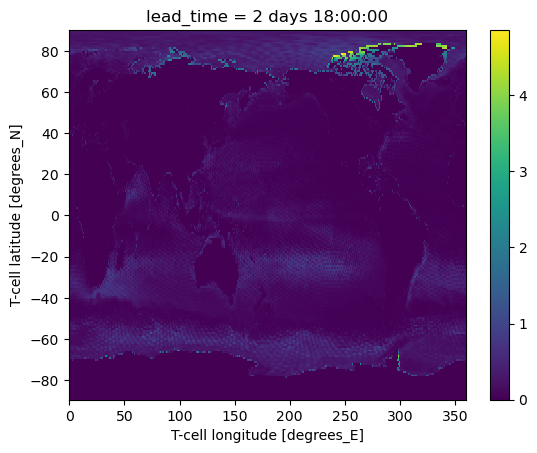

In [32]:
# Spatial RMSE
ileadtime = 10
icetk_rmse_latlon = np.sqrt(icetk_sqerror.mean(dim=('time')),)
icetk_rmse_latlon.isel(lead_time=ileadtime).plot()
plt.show()

### Land : Soil Moisture

In [33]:
ileadtime = 10
leadtime = int(ds_pred.lead_time[ileadtime].values/3600/1e9)

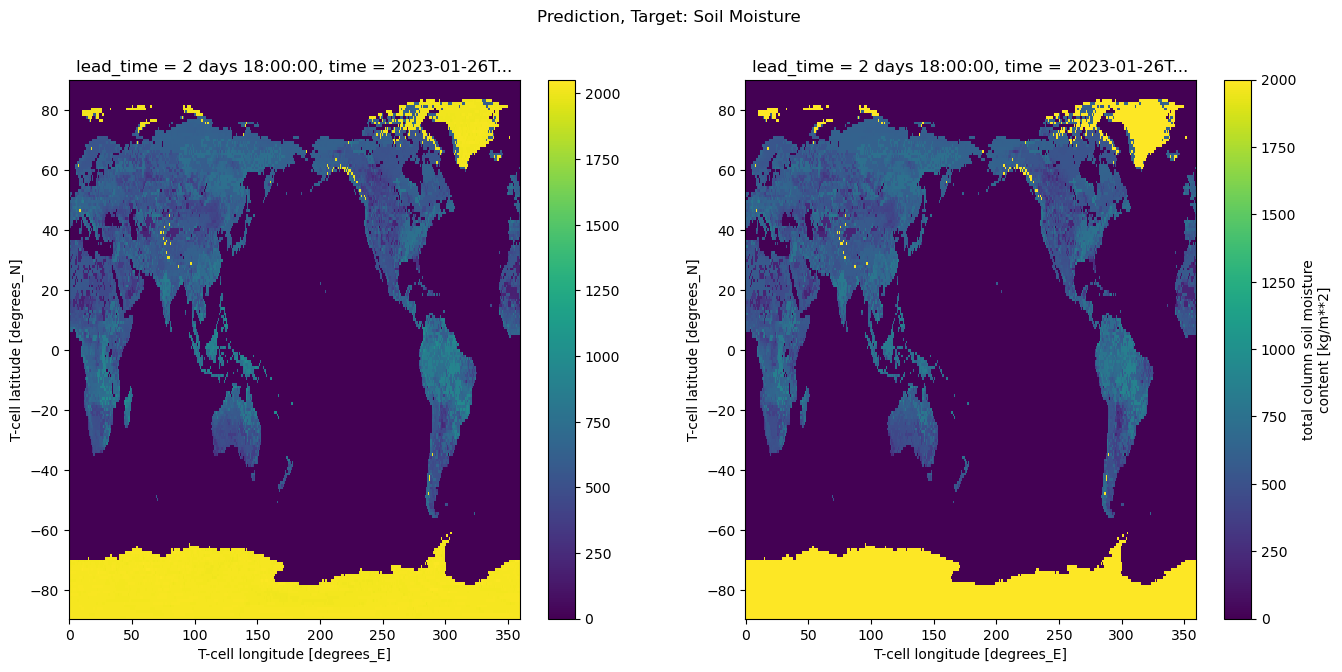

In [41]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
kwargs = {"cmap":"viridis"}
pred = ds_pred.soilm.isel(time=itime, lead_time=ileadtime)*(atm.land_static.rename({"grid_yt":"lat", "grid_xt":"lon"}))
pred.plot(ax=ax[0], **kwargs)
tar = ds_tar.soilm.isel(time=itime, lead_time=ileadtime)
tar.plot(ax=ax[1], **kwargs)
plt.suptitle(f'Prediction, Target: Soil Moisture')
plt.show()

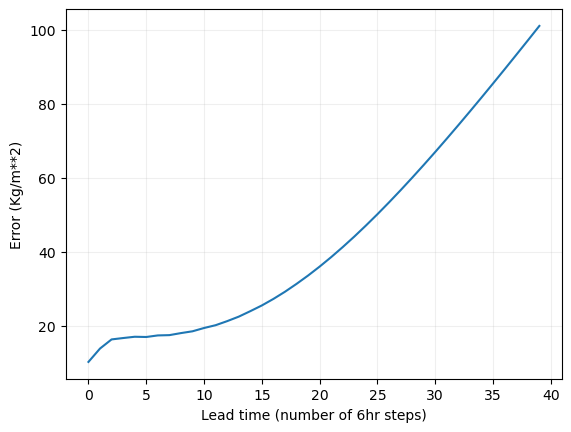

In [42]:
soilm_sqerror = (ds_tar.soilm - ds_pred.soilm*(atm.land_static.rename({"grid_xt":"lon", "grid_yt":"lat"})))**2
plt.plot(np.sqrt(soilm_sqerror.mean(dim=('time','lat', 'lon'))))
plt.ylabel('Error (Kg/m**2)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

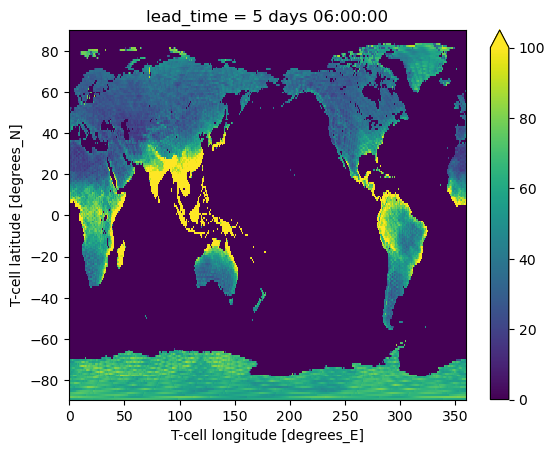

In [46]:
# Spatial RMSE
ileadtime = 20
soilm_rmse_latlon = np.sqrt(soilm_sqerror.mean(dim=('time')),)
soilm_rmse_latlon.isel(lead_time=ileadtime).plot(vmin=0, vmax=100)
plt.show()

### Local plots

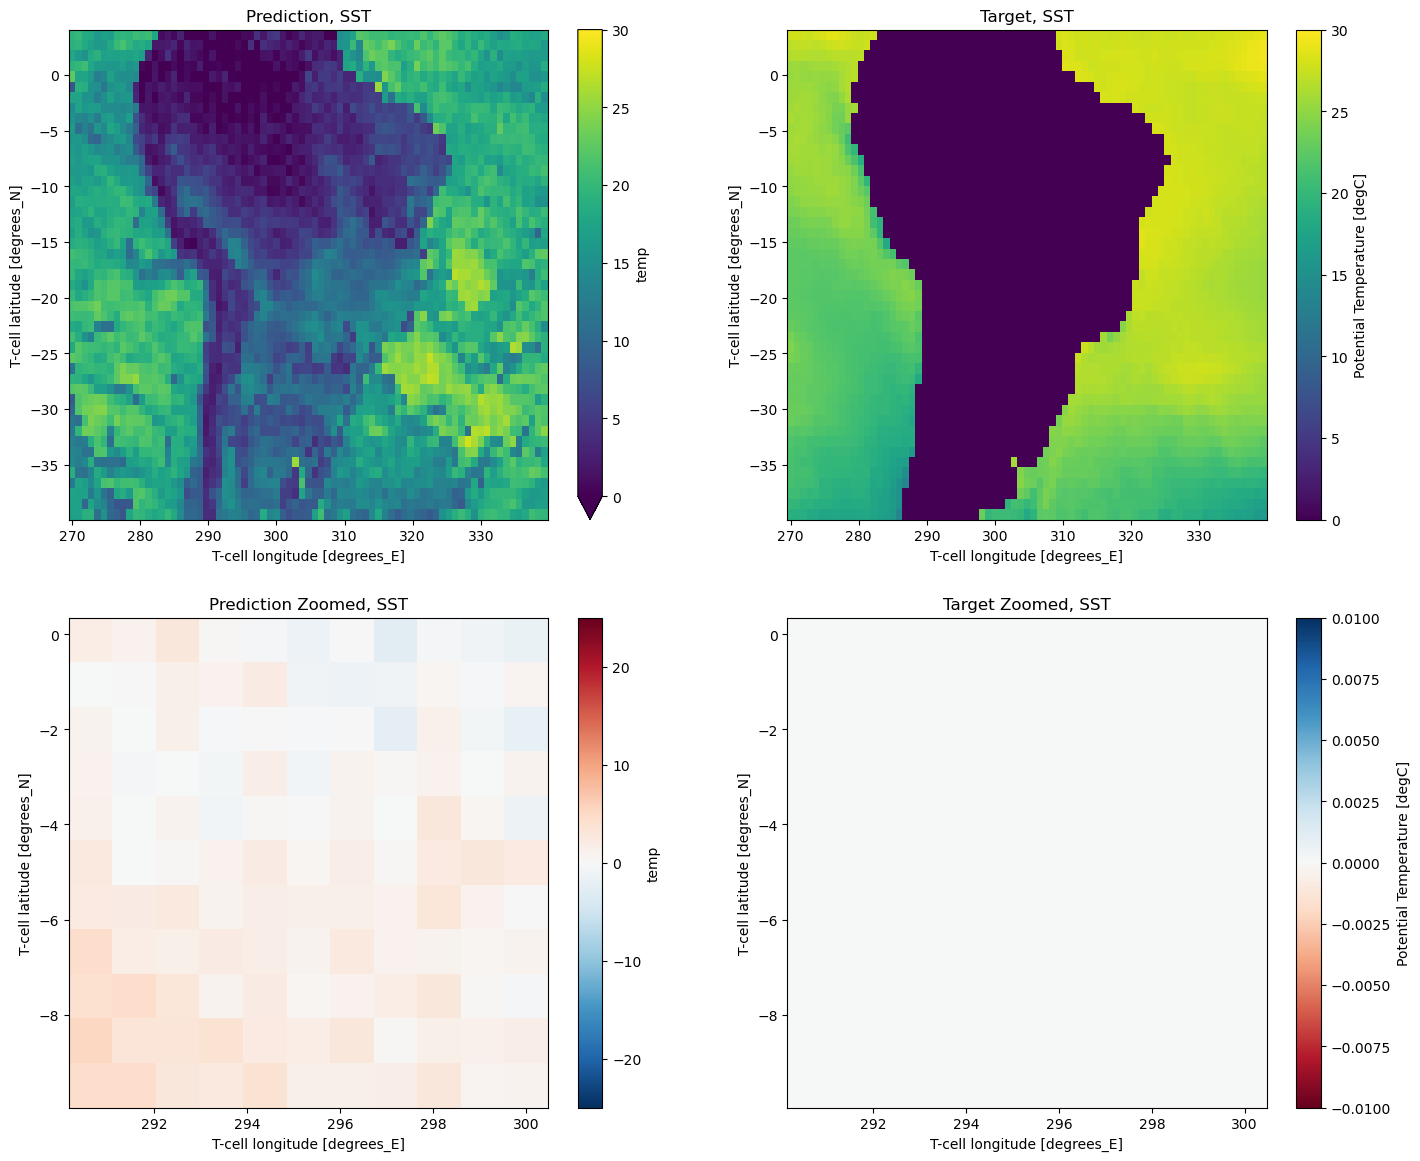

In [13]:
depth = 0 # Surface

fig, ax = plt.subplots(2, 2, figsize=(17,14))

# Prediction
pred_temp = ds_pred.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
pred_temp_zoom = ds_pred.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
pred_temp.plot(ax=ax[0,0], vmin=0, vmax=30); ax[0,0].set_title("Prediction, SST")
pred_temp_zoom.plot(ax=ax[1,0], vmin=-25, vmax=25, cmap='RdBu_r'); ax[1,0].set_title("Prediction Zoomed, SST")

# Target
tar_temp = ds_tar.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
tar_temp_zoom = ds_tar.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
tar_temp.plot(ax=ax[0,1], vmin=0, vmax=30); ax[0,1].set_title("Target, SST")
tar_temp_zoom.plot(ax=ax[1,1], vmin=-0.01, vmax=0.01, cmap='RdBu'); ax[1,1].set_title("Target Zoomed, SST")
#plt.savefig("Input_Prediction_Target_SST_Local.png", dpi=300)
plt.show()